In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


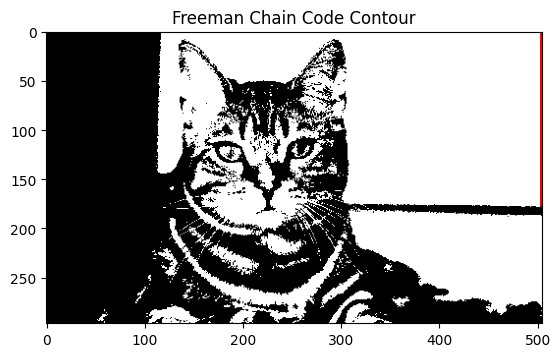

Freeman Chain Code: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

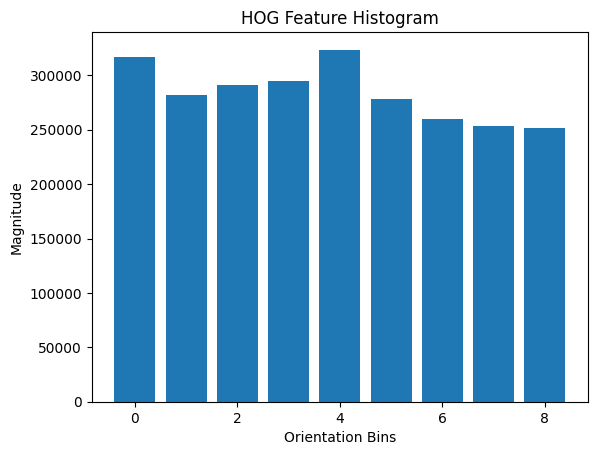

HOG Histogram: [316572.41187844 281555.51942424 291089.59099707 295139.33401925
 323604.8315687  278575.89165493 260294.1348554  253577.16802346
 251944.01655541]
Convex Hull Points: [(0, 117), (0, 504), (289, 504), (296, 351), (296, 59), (294, 53), (293, 52), (1, 116)]


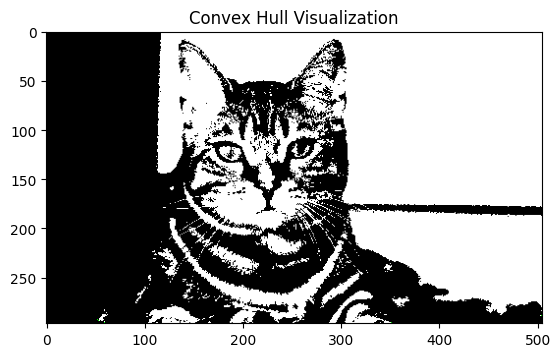

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Load and preprocess image (convert to binary)
def load_binary_image(image_path):
    image = Image.open(image_path).convert('L')  # Convert to grayscale
    image = np.array(image, dtype=np.float64)  # Convert to float64 to avoid overflow in HOG calculation
    binary_image = (image > 128).astype(np.uint8) * 255  # Convert to binary (using 128 as the threshold)
    return binary_image, image  # Return both binary and grayscale images

#1 Freeman Chain Code visualization
def freeman_chain_code(binary_image):
    directions = [(0, 1), (-1, 1), (-1, 0), (-1, -1), (0, -1), (1, -1), (1, 0), (1, 1)]
    contour = []
    visited = set()
    for i in range(binary_image.shape[0]):
        for j in range(binary_image.shape[1]):
            if binary_image[i, j] == 255:
                contour.append((i, j))
                visited.add((i, j))
                break
        if contour:
            break

    chain_code = []
    current = contour[0]
    while True:
        found = False
        for idx, (dx, dy) in enumerate(directions):
            next_point = (current[0] + dx, current[1] + dy)
            if (0 <= next_point[0] < binary_image.shape[0] and
                0 <= next_point[1] < binary_image.shape[1] and
                binary_image[next_point] == 255 and
                next_point not in visited):
                chain_code.append(idx)
                contour.append(next_point)
                visited.add(next_point)
                current = next_point
                found = True
                break
        if not found or current == contour[0]:
            break

    # Visualize chain code points on the binary image
    output_image = np.stack((binary_image,) * 3, axis=-1)
    for (x, y) in contour:
        output_image[x, y] = [255, 0, 0]  # Marking contour points in red
    plt.imshow(output_image)
    plt.title('Freeman Chain Code Contour')
    plt.show()

    return chain_code

# 2Histogram of Oriented Gradients visualization
def hog_manual(image):
    gx = np.zeros_like(image, dtype=np.float64)
    gy = np.zeros_like(image, dtype=np.float64)
    for i in range(1, image.shape[0] - 1):
        for j in range(1, image.shape[1] - 1):
            gx[i, j] = image[i, j + 1] - image[i, j - 1]
            gy[i, j] = image[i + 1, j] - image[i - 1, j]
    magnitude = np.sqrt(gx ** 2 + gy ** 2)
    angle = (np.arctan2(gy, gx) * (180 / np.pi)) % 180
    hist = np.zeros(9)
    bin_size = 20
    for a, m in zip(angle.flatten(), magnitude.flatten()):
        bin_index = int(a // bin_size)
        hist[bin_index] += m

    # Display HOG histogram as a bar plot
    plt.bar(range(9), hist)
    plt.title('HOG Feature Histogram')
    plt.xlabel('Orientation Bins')
    plt.ylabel('Magnitude')
    plt.show()

    return hist

# 3Convex Hull (Manual)
def convex_hull_manual(points):
    points = sorted(points, key=lambda p: (p[0], p[1]))

    def orientation(p, q, r):
        return (q[1] - p[1]) * (r[0] - q[0]) - (q[0] - p[0]) * (r[1] - q[1])

    def build_half(points):
        hull = []
        for p in points:
            while len(hull) >= 2 and orientation(hull[-2], hull[-1], p) <= 0:
                hull.pop()
            hull.append(p)
        return hull

    lower = build_half(points)
    upper = build_half(points[::-1])
    return lower[:-1] + upper[:-1]

# Main Execution
if __name__ == "__main__":
    # Update the path to your image
    image_path = '/content/drive/MyDrive/CATTO.png'
    binary_image, grayscale_image = load_binary_image(image_path)

    # Freeman Chain Code
    chain_code = freeman_chain_code(binary_image)
    print("Freeman Chain Code:", chain_code)

    # Histogram of Oriented Gradients
    hog_histogram = hog_manual(grayscale_image)  # Use grayscale image for HOG computation
    print("HOG Histogram:", hog_histogram)

    # Convex Hull
    points = [(i, j) for i in range(binary_image.shape[0]) for j in range(binary_image.shape[1]) if binary_image[i, j] == 255]
    hull_points = convex_hull_manual(points)
    print("Convex Hull Points:", hull_points)

    # Visualize Convex Hull
    hull_image = np.stack((binary_image,) * 3, axis=-1)  # Create a copy of the binary image in RGB
    hull_points = np.array(hull_points)
    hull_points = hull_points[hull_points[:, 0] >= 0]  # Filter out invalid points

    for point in hull_points:
        hull_image[point[0], point[1]] = [0, 255, 0]  # Mark convex hull points in green

    plt.imshow(hull_image)
    plt.title('Convex Hull Visualization')
    plt.show()


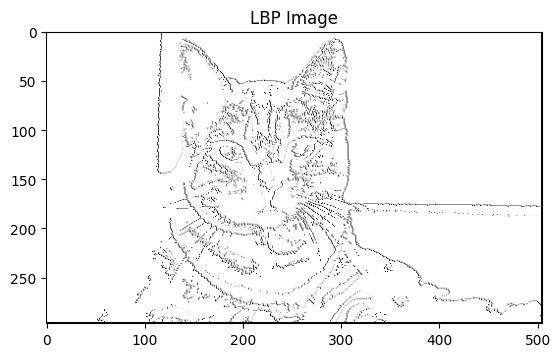

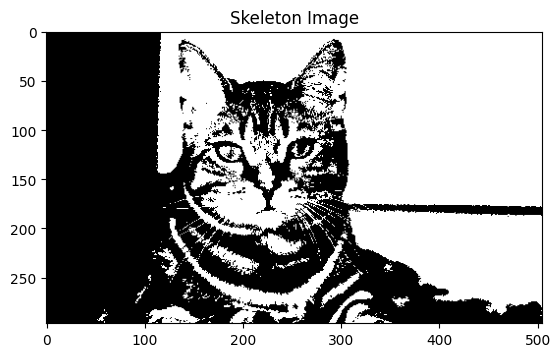

Bounding Box: (52, 0, 504, 296)


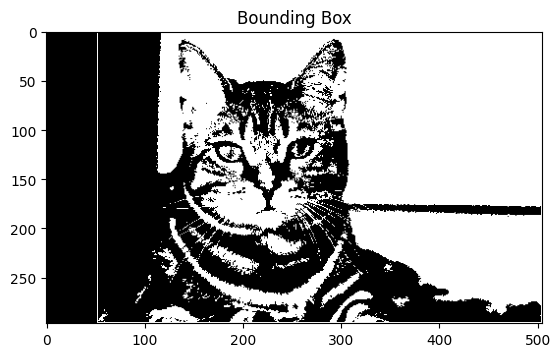

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image  # Import PIL for image loading

# Load and preprocess image (convert to binary)
def load_binary_image(image_path):
    image = Image.open(image_path).convert('L')  # Convert to grayscale (L mode)
    image = np.array(image)  # Convert to numpy array
    binary_image = (image > 128).astype(np.uint8) * 255  # Threshold to binary (values above 128 are white)
    return binary_image


# 4. Local Binary Pattern (LBP)
def lbp_manual(image):
    rows, cols = image.shape
    lbp = np.zeros_like(image, dtype=np.uint8)
    for i in range(1, rows - 1):
        for j in range(1, cols - 1):
            center = image[i, j]
            binary_values = [image[i + dx, j + dy] >= center for dx, dy in [(-1, -1), (-1, 0), (-1, 1), (0, 1), (1, 1), (1, 0), (1, -1), (0, -1)]]
            lbp_value = sum(val << idx for idx, val in enumerate(binary_values))
            lbp[i, j] = lbp_value
    return lbp

# 5. Skeletonization
def skeletonize_manual(binary_image):
    skeleton = np.zeros_like(binary_image)
    temp_image = binary_image.copy()
    kernel = np.ones((3, 3), dtype=np.uint8)
    while True:
        eroded = np.zeros_like(temp_image)
        for i in range(1, temp_image.shape[0] - 1):
            for j in range(1, temp_image.shape[1] - 1):
                if np.all(temp_image[i-1:i+2, j-1:j+2] == kernel):
                    eroded[i, j] = 255
        opened = np.zeros_like(eroded)
        for i in range(1, eroded.shape[0] - 1):
            for j in range(1, eroded.shape[1] - 1):
                if eroded[i, j] == 255:
                    opened[i-1:i+2, j-1:j+2] = 255
        temp = np.clip(temp_image - opened, 0, 255)
        skeleton = np.clip(skeleton + temp, 0, 255)
        temp_image = eroded
        if np.count_nonzero(temp_image) == 0:
            break
    return skeleton


# 6. Bounding Box (Manual)
def bounding_box_manual(binary_image):
    non_zero_points = [(i, j) for i in range(binary_image.shape[0]) for j in range(binary_image.shape[1]) if binary_image[i, j] == 255]
    x_min = min(p[1] for p in non_zero_points)
    x_max = max(p[1] for p in non_zero_points)
    y_min = min(p[0] for p in non_zero_points)
    y_max = max(p[0] for p in non_zero_points)
    return (x_min, y_min, x_max, y_max)

# Main Execution
if __name__ == "__main__":
    # Update the path to your image
    image_path = '/content/drive/MyDrive/CATTO.png'
    binary_image = load_binary_image(image_path)

    # Local Binary Pattern
    lbp_image = lbp_manual(binary_image)
    plt.imshow(lbp_image, cmap='gray')
    plt.title('LBP Image')
    plt.show()

    # Skeleton
    skeleton_image = skeletonize_manual(binary_image)
    plt.imshow(skeleton_image, cmap='gray')
    plt.title('Skeleton Image')
    plt.show()


    # Bounding Box
    bounding_box = bounding_box_manual(binary_image)
    print("Bounding Box:", bounding_box)
    result_image = binary_image.copy()
    for x in range(bounding_box[0], bounding_box[2] + 1):
        result_image[bounding_box[1], x] = 255
        result_image[bounding_box[3], x] = 255
    for y in range(bounding_box[1], bounding_box[3] + 1):
        result_image[y, bounding_box[0]] = 255
        result_image[y, bounding_box[2]] = 255
    plt.imshow(result_image, cmap='gray')
    plt.title('Bounding Box')
    plt.show()
